In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\Valens\Documents\Python Anaconda\New York City Airbnb Open Data analysis'

In [3]:
df = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'AB_NYC_2019_CLEAN.pkl'))

In [4]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [5]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2539,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,2018-10-19 00:00:00.000000000,0.21,6,365
1,2595,Skylit Midtown Castle,2595,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,2019-05-21 00:00:00.000000000,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,3647,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,2018-10-04 01:47:23.910099456,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,3831,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,2019-07-05 00:00:00.000000000,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,5022,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,2018-11-19 00:00:00.000000000,0.10,1,0


In [6]:
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

## Varibles that suitable for exploratory visual analysis
neighbourhood_group, price, minimum_nights, number of reviews, calculate_host_listings_count and availability_365

In [7]:
sub_df = df[['neighbourhood_group','price','minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365']]

In [8]:
sub_df_test = df[['price','minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365']]

Text(0.5, 1.0, 'Correlation Matrix')

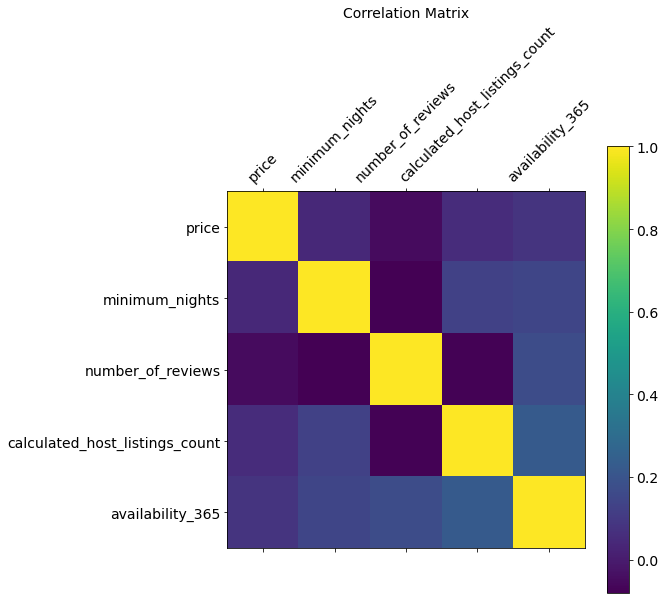

In [9]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(sub_df_test.corr(), fignum=f.number) # type of plot
plt.xticks(range(sub_df_test.shape[1]), sub_df_test.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(sub_df_test.shape[1]), sub_df_test.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

In [10]:
sub_df.head()

,neighbourhood_group,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,149.0,1,9,6,365
1,Manhattan,225.0,1,45,2,355
2,Manhattan,150.0,3,0,1,365
3,Brooklyn,89.0,1,270,1,194
4,Manhattan,80.0,10,9,1,0


In [11]:
sub_df.corr()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
price,1.000000,0.042804,-0.047921,0.057462,0.081841
minimum_nights,0.042804,1.000000,-0.080116,0.127960,0.144303
number_of_reviews,-0.047921,-0.080116,1.000000,-0.072376,0.172028
calculated_host_listings_count,0.057462,0.127960,-0.072376,1.000000,0.225701
availability_365,0.081841,0.144303,0.172028,0.225701,1.000000


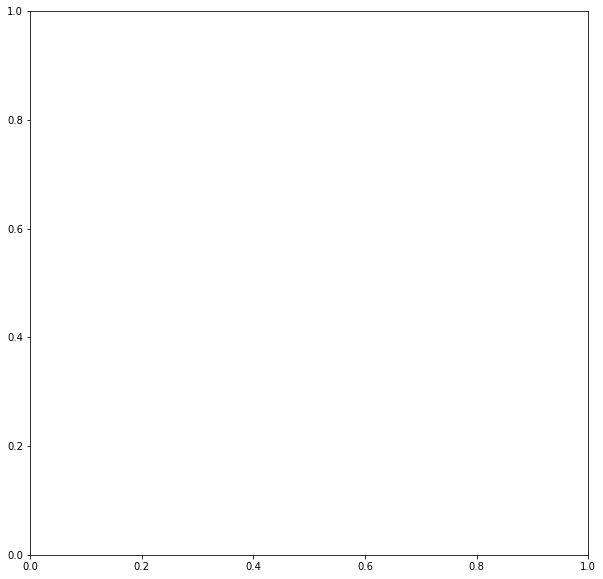

In [12]:
# Create a subplot with matplotlib. What it does is create an empty output, but this is okay—it's just to show the subplots.

f,ax = plt.subplots(figsize=(10,10))

In [13]:
# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.

corr = sns.heatmap(sub_df.corr(), annot = True, ax = ax) 

# The `annot` argument allows the plot to place the correlation coefficients onto the heatmap.


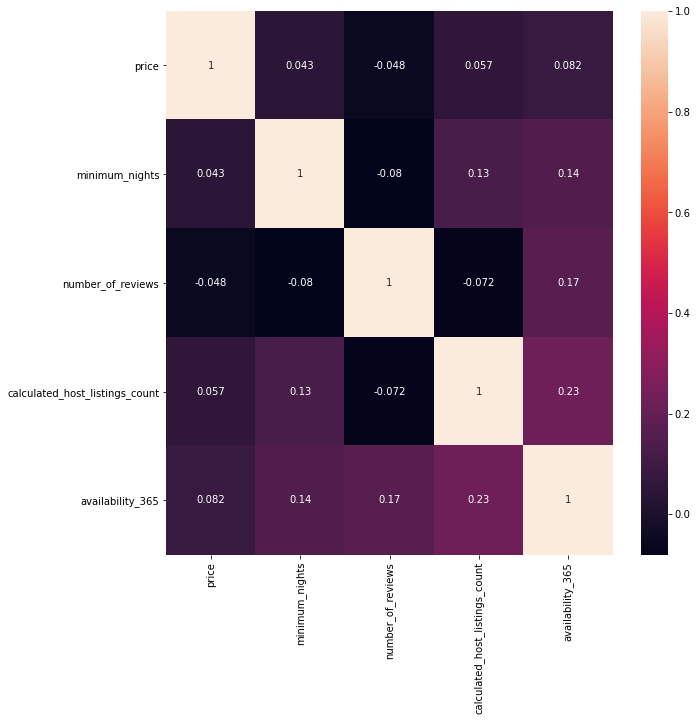

In [14]:
corr.figure

## From the correlation matrix they don't have any relationship between variables, this has been shown from the correlation matrix above where most of the values are around 0

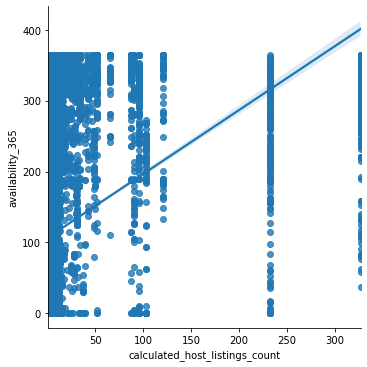

In [15]:
# Create a scatterplot for the "calculated_host_listings_count" and "availability_365"

sns.lmplot(x = 'calculated_host_listings_count', y = 'availability_365', data = sub_df)

## base on the scatter plot above it further prove the point of the correlation matrix where there is no relationship on the number of listing that the host had and the number of availability of the house.

# Pair Plots

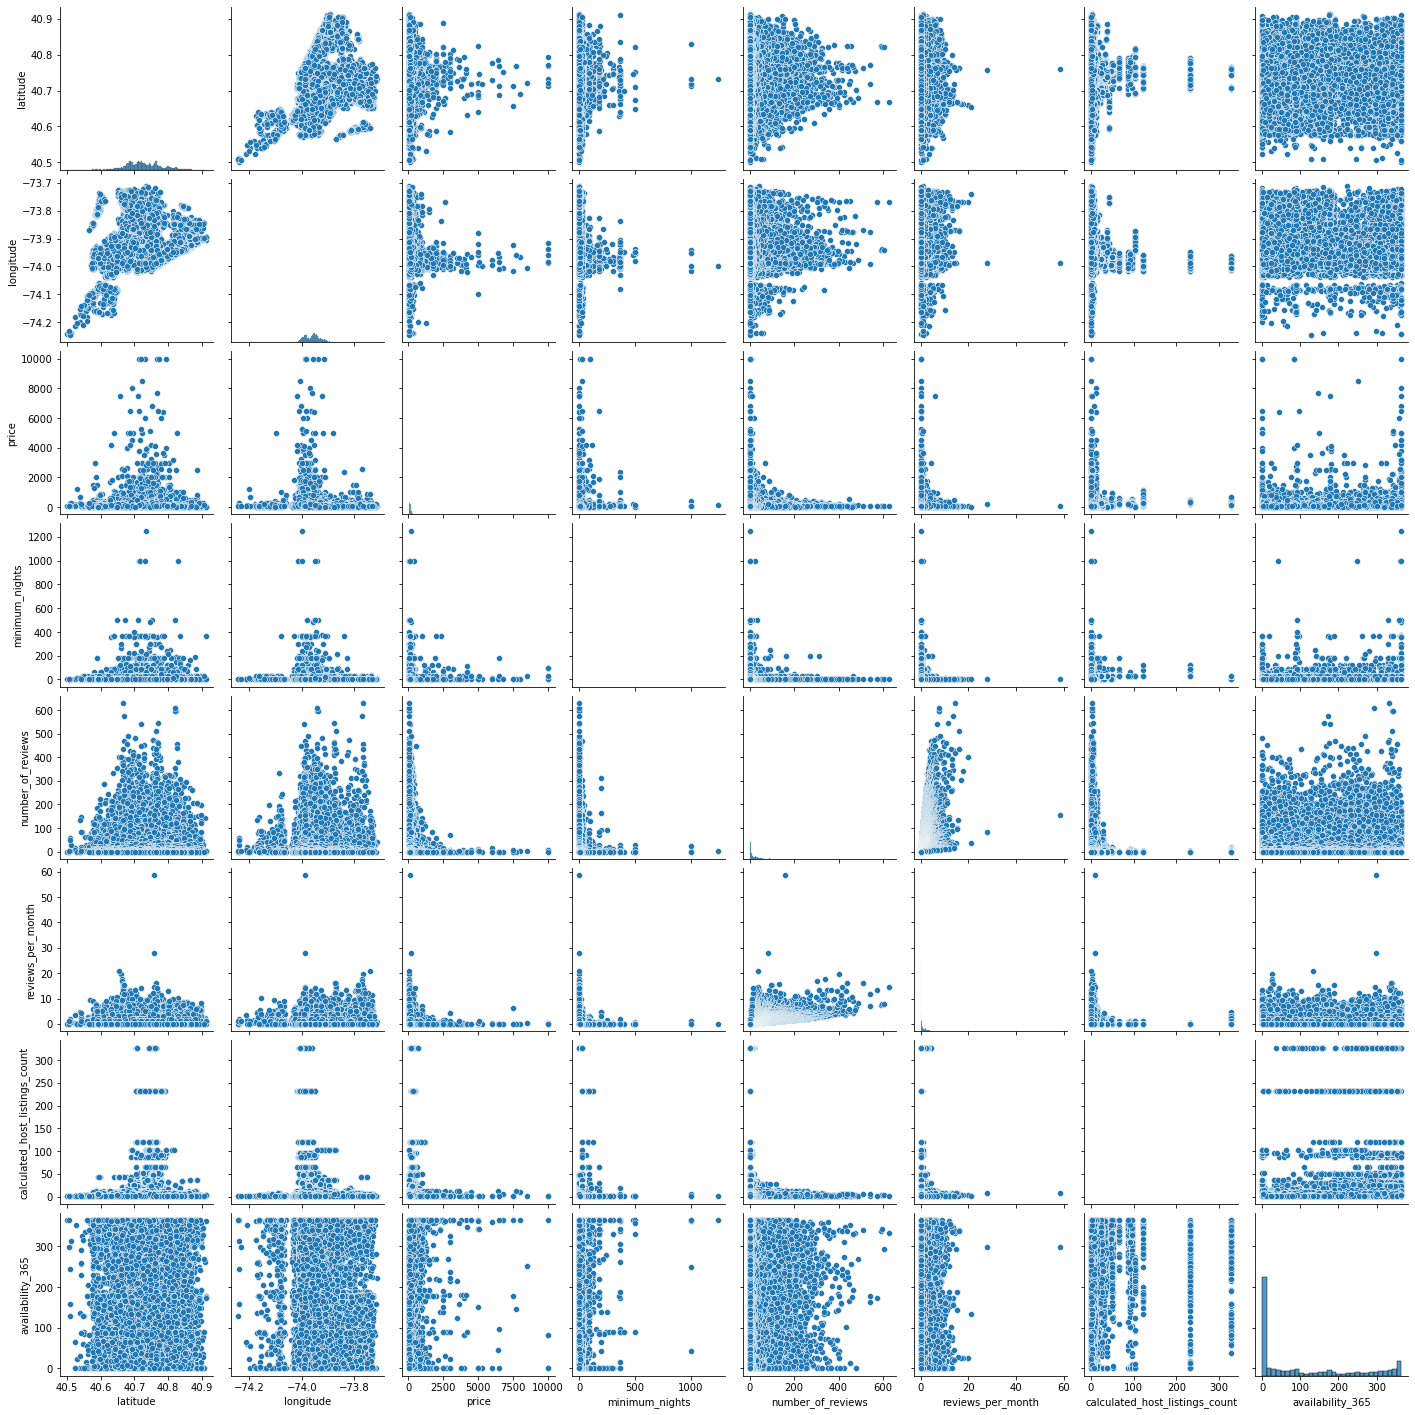

In [16]:
# Create a pair plot 

g = sns.pairplot(df)

## base on the above I can't see any correlation that stands out. But I would like dig further on the number of reviews and price. This is solely from my experience where people tend to only want to stay in a place where they have alot of reviews. Having a lot of reviews shows the condition of the place. I find it quite odd that from the data number of reviews do not have an impact on the price.

D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='number_of_reviews', ylabel='Density'>

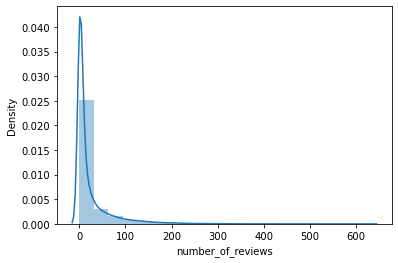

In [17]:
sns.distplot(df['number_of_reviews'], bins = 20)

In [18]:
df['number_of_reviews'].value_counts()

0      10052
1       5244
2       3465
3       2520
4       1994
       ...  
326        1
439        1
594        1
335        1
607        1
Name: number_of_reviews, Length: 394, dtype: int64

In [19]:
df.loc[df['number_of_reviews'] <=50, 'Review Category'] = 'Low Review'

In [20]:
df.loc[(df['number_of_reviews'] >= 51) & (df['number_of_reviews'] <= 100), 'Review Category'] = 'Medium Review'

In [21]:
df.loc[df['number_of_reviews'] >=101, 'Review Category'] = 'High Review'

In [22]:
df['Review Category'].value_counts(dropna = False)

Low Review       41936
Medium Review     3964
High Review       2995
Name: Review Category, dtype: int64

D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

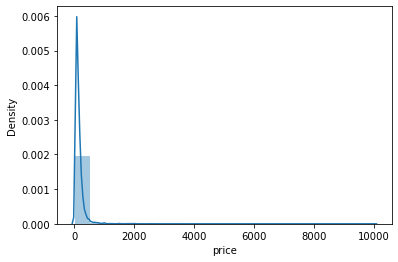

In [23]:
sns.distplot(df['price'], bins = 20)

In [24]:
df['price'].value_counts()

100.0     2051
150.0     2047
50.0      1534
60.0      1458
200.0     1401
          ... 
2103.0       1
402.0        1
3600.0       1
477.0        1
338.0        1
Name: price, Length: 674, dtype: int64

In [25]:
df.loc[df['price'] <=100, 'Price Category'] = 'Low Price'

In [26]:
df.loc[(df['price'] >= 101) & (df['price'] <= 300), 'Price Category'] = 'Medium Price'

In [27]:
df.loc[df['price'] >=301, 'Price Category'] = 'High Price'

In [28]:
df['Price Category'].value_counts()

Low Price       23917
Medium Price    21621
High Price       3357
Name: Price Category, dtype: int64

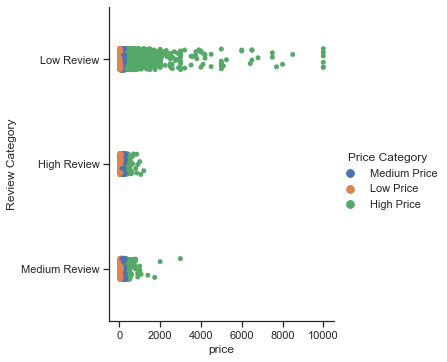

In [29]:
# Create a categorical plot in seaborn using the price and review categorise based on the above

sns.set(style="ticks")
g = sns.catplot(x="price", y="Review Category", hue= 'Price Category', data=df)

## Based on the categorical plot above that the review doesn't have any correlation. This could be that the host don't base their price because of review, they may just base their price base on the quality of the house. This will raise another question which is what variable does the host use to categorise the pricing. 

# Hypothesis
At the moment I am not sure what kind of hypothesis that I could do to this data set. This is because a lot of the variables doesn't have any correlation. In the beginning I would expect that there is a correlation between price with the number of review. 

However, base on this analysis my hypothesis would be that the prices of the house is impacted either by location of the airbnb or the neighbourhood group or both. 

In [31]:
df['price'].max()

10000.0